In [1]:
__author__ = 'Elliot Simon'
__email__ = 'ellsim@dtu.dk'
__date__ = 'July 1, 2020'

'''
The purpose of this program is to load in raw measurement data from a DTU WindScanner scanning lidar and generate a 
timeline of effective measurement range.
'''

'\nThe purpose of this program is to load in raw measurement data from a DTU WindScanner scanning lidar and generate a \ntimeline of effective measurement range.\n'

In [2]:
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import datetime
from pathlib import Path
import os

In [3]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['figure.dpi'] = 70
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['xtick.major.pad'] = '8'
plt.rcParams['ytick.major.pad'] = '8'

In [4]:
%matplotlib inline

In [5]:
num_los = 60

# Load/Format Data

In [6]:
src='E:\\TotalControl\\Scotland\\TC_S_WHITTLE_PHASE1\\merged\\d_3_9'
src_path = Path(src)

In [7]:
wind_files_path = src_path.glob('*_merged.txt')
wind_files = list(wind_files_path)
wind_filenames = list([x.stem for x in wind_files])

In [8]:
def read_file(file):
    df = pd.read_csv(file, sep=';', header=None, index_col=1)
    df.index.rename('los_num', inplace=True)
    del df[0]
    df.columns = range(0,len(df.columns))
    df.rename(columns = {4:'azim'}, inplace=True)
    df.rename(columns = {5:'elev'}, inplace=True)
    return df

In [9]:
active_file = wind_files[15]
out_filename = active_file.stem.split('_merged')[0]
print(active_file)

E:\TotalControl\Scotland\TC_S_WHITTLE_PHASE1\merged\d_3_9\20200402034617_PPI1_merged.txt


In [10]:
%%time
df = read_file(active_file)

Wall time: 1min 7s


In [11]:
df.head()

,0,1,2,3,azim,elev,6,7,8,9,...,380,381,382,383,384,385,386,387,388,389
los_num,,,,,,,,,,,,,,,,,,,,,
0,0,76,3.668644e+09,3.668644e+09,330.483,-0.0,100,8.428,-28.405,1.022,...,-32.277,0.165,1980,9.520,-29.822,0.982,2000,-5.951,-32.152,0.165
1,80,101,3.668644e+09,3.668644e+09,331.483,0.0,100,21.949,-32.053,0.165,...,-31.003,0.165,1980,-16.623,-31.660,0.165,2000,-16.135,-30.892,0.165
2,102,126,3.668644e+09,3.668644e+09,332.483,0.0,100,22.072,-28.730,1.721,...,-28.969,1.995,1980,-11.356,-29.842,0.657,2000,21.780,-28.988,0.439
3,128,151,3.668644e+09,3.668644e+09,333.483,0.0,100,-4.702,-30.151,0.165,...,-29.929,0.165,1980,11.681,-27.872,1.681,2000,12.572,-29.751,0.165
4,152,176,3.668644e+09,3.668644e+09,334.483,-0.0,100,-27.487,-29.669,0.165,...,-32.655,0.958,1980,18.555,-30.207,0.176,2000,18.143,-30.145,0.546


In [12]:
# Convert from LabVIEW time to datetime object (UTC format)
def convtime(labviewtime):
    unixtime = labviewtime - 2082844800
    timestamp = datetime.datetime.utcfromtimestamp(int(unixtime))
    return timestamp

In [13]:
# Pull out a list of the measured range gates
range_gates = df.iloc[0,6::4].tolist()

In [39]:
range_gates

[100.0,
 120.0,
 140.0,
 160.0,
 180.0,
 200.0,
 220.0,
 240.0,
 260.0,
 280.0,
 300.0,
 320.0,
 340.0,
 360.0,
 380.0,
 400.0,
 420.0,
 440.0,
 460.0,
 480.0,
 500.0,
 520.0,
 540.0,
 560.0,
 580.0,
 600.0,
 620.0,
 640.0,
 660.0,
 680.0,
 700.0,
 720.0,
 740.0,
 760.0,
 780.0,
 800.0,
 820.0,
 840.0,
 860.0,
 880.0,
 900.0,
 920.0,
 940.0,
 960.0,
 980.0,
 1000.0,
 1020.0,
 1040.0,
 1060.0,
 1080.0,
 1100.0,
 1120.0,
 1140.0,
 1160.0,
 1180.0,
 1200.0,
 1220.0,
 1240.0,
 1260.0,
 1280.0,
 1300.0,
 1320.0,
 1340.0,
 1360.0,
 1380.0,
 1400.0,
 1420.0,
 1440.0,
 1460.0,
 1480.0,
 1500.0,
 1520.0,
 1540.0,
 1560.0,
 1580.0,
 1600.0,
 1620.0,
 1640.0,
 1660.0,
 1680.0,
 1700.0,
 1720.0,
 1740.0,
 1760.0,
 1780.0,
 1800.0,
 1820.0,
 1840.0,
 1860.0,
 1880.0,
 1900.0,
 1920.0,
 1940.0,
 1960.0,
 1980.0,
 2000.0]

In [15]:
df.dropna(how='any', inplace=True)

In [16]:
df['dt_stop'] = df[3].apply(lambda x: convtime(x))

In [17]:
def get_rg_col(rg, rg_list=range_gates):
    '''
    Returns column position of specified range gate (provided in meters)

    Note that this gives the base column position for the 4-set (distance, radial_speed, cnr, dispersion)
    So you need to add 1, 2, or 3 to this result for selecting the corresponding measurement
    '''
    return rg_list.index(rg) * 4 + 6

# Data QC

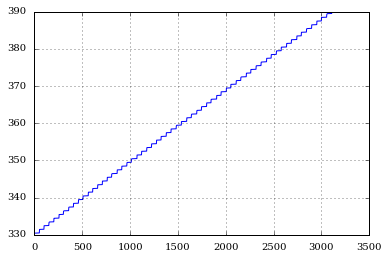

In [18]:
# Check all unique azimuths are within range of expected values
plt.plot(sorted(set(df['azim'])))

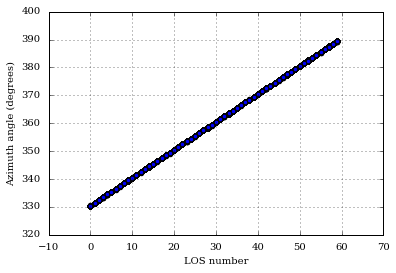

In [19]:
# Check that there aren't any weird azimuths (each multiple of LOS corresponds to the right azimuth)
plt.scatter(df.index % num_los, df['azim'])
plt.xlabel('LOS number')
plt.ylabel('Azimuth angle (degrees)');

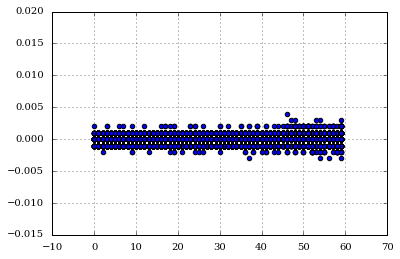

In [20]:
# Check all unique elevations are within range of expected values (for PPI should all be equal)
plt.scatter(df.index % num_los, df['elev'])

# Filtering

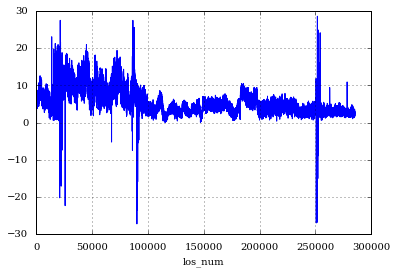

In [21]:
df[get_rg_col(range_gates[0])+1].plot()

In [22]:
# Loops through list of range gates and applies filters 
for dist in range_gates:
    rg = get_rg_col(dist)
    # This filters low signal
    mask = df[rg+2] < -26
    df.loc[mask, rg+1] = np.nan
    
    # This filters high signal (object/hard target)
    mask = df[rg+2] > 0
    df.loc[mask, rg+1] = np.nan

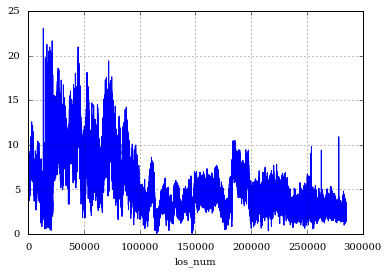

In [23]:
df[get_rg_col(range_gates[0])+1].plot()

# Calculate range

In [24]:
df.set_index(['dt_stop'], inplace=True)
#df.sort_index(inplace=True)

In [25]:
df = df.iloc[:,7::4]

In [26]:
df.columns = range_gates

In [27]:
df.head()

,100.0,120.0,140.0,160.0,180.0,200.0,220.0,240.0,260.0,280.0,...,1820.0,1840.0,1860.0,1880.0,1900.0,1920.0,1940.0,1960.0,1980.0,2000.0
dt_stop,,,,,,,,,,,,,,,,,,,,,
2020-04-02 03:46:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02 03:46:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02 03:46:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02 03:46:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02 03:46:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
valid = ~np.isnan(df.resample('1Min').mean())

In [29]:
valid.shape

(2566, 96)

In [30]:
num_valid = valid.sum(axis=1)

In [31]:
pct_valid = 100*(valid.sum(axis=1) / len(range_gates))

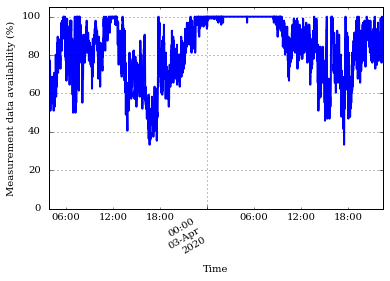

In [32]:
pct_valid.plot(linewidth=2)
plt.ylim(0,105)
plt.ylabel('Measurement data availability (%)')
plt.xlabel('Time')
plt.gcf().autofmt_xdate()
plt.savefig(out_filename + '_pct_valid.png', bbox_inches='tight')

In [33]:
pct_valid.to_csv(out_filename + '_pct_valid.csv')